In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dask
import dask.dataframe as dd

from sklearn.model_selection import GridSearchCV, KFold,KFold, cross_val_score

from sklearn.preprocessing import PolynomialFeatures, StandardScaler,RobustScaler 

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso

from sklearn.metrics import accuracy_score, f1_score,mean_squared_error,classification_report,confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dask
import dask.dataframe as dd

import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import GridSearchCV, KFold,KFold, cross_val_score

from sklearn.preprocessing import PolynomialFeatures, StandardScaler,RobustScaler 

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso

from sklearn.metrics import accuracy_score, f1_score,mean_squared_error,classification_report,confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import make_column_transformer

from scipy import stats
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_pickle("end_result-v2.pickle")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1796287 entries, 0 to 1940933
Data columns (total 28 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   park_id                     object        
 1   clc_code                    object        
 2   area_code                   object        
 3   evse_id                     object        
 4   datetime_start              datetime64[ns]
 5   datetime_stop               datetime64[ns]
 6   city                        object        
 7   latitude                    float64       
 8   longitude                   float64       
 9   postal_code                 category      
 10  Charging_Time_in_hours      float64       
 11  year                        category      
 12  month                       category      
 13  day                         category      
 14  day_of_week_name_Start      object        
 15  Precipitation               float64       
 16  Temperature       

In [5]:
df["postal_code"] = df["postal_code"].astype('int')
df["postal_code"] = df["postal_code"].astype('category')
df["year"] = df["year"].astype('int')

In [9]:
year =pd.Categorical(df.year)
df = df.set_index(["evse_id","year"])
df["year"] =year
print(df.head())

                                                            park_id  clc_code  \
evse_id               year                                                      
hj_DE*BLN*E*174060033 2019  hj_31c455b8-420e-46af-bce6-436b65ccc416  Suburban   
                      2019  hj_31c455b8-420e-46af-bce6-436b65ccc416  Suburban   
                      2019  hj_31c455b8-420e-46af-bce6-436b65ccc416  Suburban   
                      2019  hj_31c455b8-420e-46af-bce6-436b65ccc416  Suburban   
                      2019  hj_31c455b8-420e-46af-bce6-436b65ccc416  Suburban   

                               area_code          datetime_start  \
evse_id               year                                         
hj_DE*BLN*E*174060033 2019  120650165165 2019-12-17 09:00:13.369   
                      2019  120650165165 2019-12-17 09:00:13.369   
                      2019  120650165165 2019-12-17 09:00:13.369   
                      2019  120650165165 2019-12-17 09:58:28.352   
                      20

In [14]:
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

exog_vars = ["pd","Precipitation","Temperature","year",'day_of_week_name_Start','clc_code','day','month','Parking','university','Biergarten','Kino','Restaurant','Community_Centre','Hospital','Bahnhof']
exog = sm.add_constant(df[exog_vars])
mod = PooledOLS(df.Charging_Time_in_hours, exog)
pooledOLS_res = mod.fit(cov_type = 'clustered',cluster_entity = True)

/home/col-gku/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

/home/col-gku/.local/lib/python3.8/site-packages/linearmodels/panel/results.py:544: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  out_df: DataFrame = concat(out, 1)


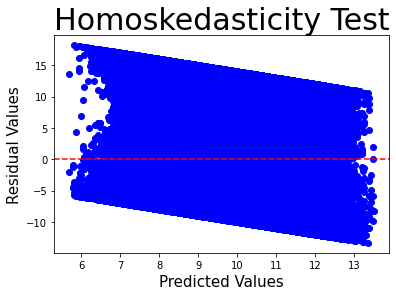

In [17]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
# 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values',fontsize = 15)
ax.set_ylabel('Residual Values',fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [37]:
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

exog_vars = ["pd","Precipitation","Temperature","year",'day_of_week_name_Start','clc_code','day','month','Parking','university','Biergarten','Kino','Restaurant','Community_Centre','Hospital','Bahnhof']
exog = sm.add_constant(df[exog_vars])
mod = PooledOLS(df.Charging_time_in_hours_log, exog)
pooledOLS_res = mod.fit(cov_type = 'clustered',cluster_entity = True)

/home/col-gku/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


ValueError: array must not contain infs or NaNs

In [28]:
results = smf.ols("Charging_Time_in_hours ~ pd+Precipitation+Temperature+Parking+university+Biergarten+Kino+Restaurant+Community_Centre+Hospital+Bahnhof",
                  data=df).fit()

In [29]:
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     Charging_Time_in_hours   R-squared:                       0.007
Model:                                OLS   Adj. R-squared:                  0.007
Method:                     Least Squares   F-statistic:                     1145.
Date:                    Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                            21:07:02   Log-Likelihood:            -6.4363e+06
No. Observations:                 1796287   AIC:                         1.287e+07
Df Residuals:                     1796275   BIC:                         1.287e+07
Df Model:                              11                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


In [30]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 207172.720688173),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 0.476241948711377),
 ('Kurtosis', 1.6358932729352842)]

In [31]:
name = ["Chi^2", "Two-tail probability"]
test = sms.omni_normtest(results.resid)
lzip(name, test)

[('Chi^2', 24452440.42134138), ('Two-tail probability', 0.0)]

In [32]:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 1011.3054551314814),
 ('p-value', 7.082131592019863e-210),
 ('f-value', 91.98803443019007),
 ('f p-value', 6.162844835294104e-210)]

In [33]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

[('F statistic', 1.034533204161242), ('p-value', 1.5753436323346224e-58)]